In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Bakery.csv')
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Quantity
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,1
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,1
2,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,1
3,3,Cookies,2016-10-30 10:07:57,Morning,Weekend,1
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,1


In [ ]:
# Question 1
Apakah ada features yang date type-nya tidak sesuai?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18887 entries, 0 to 18886
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  18887 non-null  int64 
 1   Items          18887 non-null  object
 2   DateTime       18887 non-null  object
 3   Daypart        18887 non-null  object
 4   DayType        18887 non-null  object
 5   Quantity       18887 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 885.5+ KB


In [ ]:
# Question 2
Adakah duplicate, missing values, atau outliers?

In [4]:
df.duplicated().sum()

0

In [ ]:
#Data duplikat di sini menunjukkan item dengan nama yang sama dibeli lebih dari 1

In [5]:
df = pd.read_csv('Bakery.csv')

# Menambahkan kolom 'quantity' dengan menghitung jumlah duplikat pada setiap baris
df['Quantity'] = df.groupby(list(df.columns)).cumcount() + 1

print("Eksekusi berhasil")
df.to_csv('Bakery.csv', index=False)

Eksekusi berhasil


In [6]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Quantity
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,1
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,1
2,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,1
3,3,Cookies,2016-10-30 10:07:57,Morning,Weekend,1
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,1


In [7]:
kolom_kunci = ['DateTime', 'Items', 'Daypart', 'DayType']
perbedaan = df[df.duplicated(subset=kolom_kunci, keep=False)][kolom_kunci]
print(perbedaan)

Empty DataFrame
Columns: [DateTime, Items, Daypart, DayType]
Index: []


In [8]:

# Mengurutkan DataFrame berdasarkan kuantitas secara descending
df_sorted = df.sort_values(by='Quantity', ascending=False)

# Menghapus data duplikat dan mempertahankan record terbawah (dengan kuantitas tertinggi)
df_no_duplikat = df_sorted.drop_duplicates(subset=kolom_kunci)

df_clean = df_no_duplikat.sort_values(by='TransactionNo', ascending=True)
print(df_clean)

# Menyimpan DataFrame yang telah diperbarui kembali ke file CSV
df_clean.to_csv('Bakery.csv', index=False)

       TransactionNo          Items             DateTime    Daypart  DayType  \
0                  1          Bread  2016-10-30 09:58:11    Morning  Weekend   
1                  2   Scandinavian  2016-10-30 10:05:34    Morning  Weekend   
3                  3        Cookies  2016-10-30 10:07:57    Morning  Weekend   
4                  3            Jam  2016-10-30 10:07:57    Morning  Weekend   
2                  3  Hot chocolate  2016-10-30 10:07:57    Morning  Weekend   
...              ...            ...                  ...        ...      ...   
18882           9682   Tacos/Fajita  2017-09-04 14:32:58  Afternoon  Weekend   
18883           9682         Muffin  2017-09-04 14:32:58  Afternoon  Weekend   
18884           9683         Pastry  2017-09-04 14:57:06  Afternoon  Weekend   
18885           9683         Coffee  2017-09-04 14:57:06  Afternoon  Weekend   
18886           9684      Smoothies  2017-09-04 15:04:24  Afternoon  Weekend   

       Quantity  
0             1  
1  

In [9]:
df = pd.read_csv('Bakery.csv')
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Quantity
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,1
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,1
2,3,Cookies,2016-10-30 10:07:57,Morning,Weekend,1
3,3,Jam,2016-10-30 10:07:57,Morning,Weekend,1
4,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,1


In [13]:
df.duplicated().sum()

0

In [14]:
df.isna().sum().sort_values(ascending=False)

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
Quantity         0
dtype: int64

In [15]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Nilai unik dalam kolom '{column}':")
    print(unique_values)
    print("\n")

Nilai unik dalam kolom 'TransactionNo':
[   1    2    3 ... 9682 9683 9684]


Nilai unik dalam kolom 'Items':
['Bread' 'Scandinavian' 'Cookies' 'Jam' 'Hot chocolate' 'Muffin' 'Pastry'
 'Coffee' 'Medialuna' 'Tea' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Smoothies' 'Pick and Mix Bowls'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salam

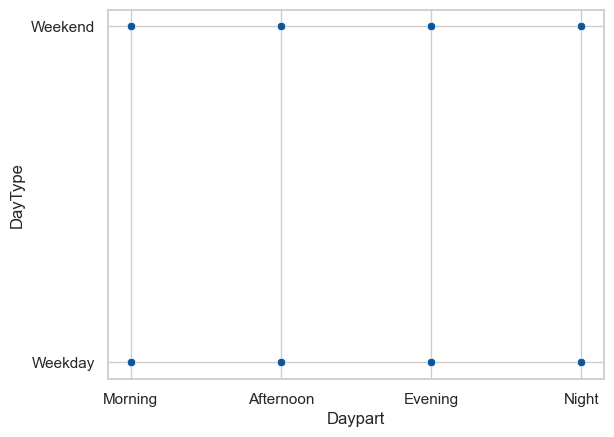

In [17]:
kolom_x = 'Daypart'
kolom_y = 'DayType'

df = pd.read_csv('Bakery.csv')

# Buat scatter plot
sns.scatterplot(x=kolom_x, y=kolom_y, data=df)
plt.show()

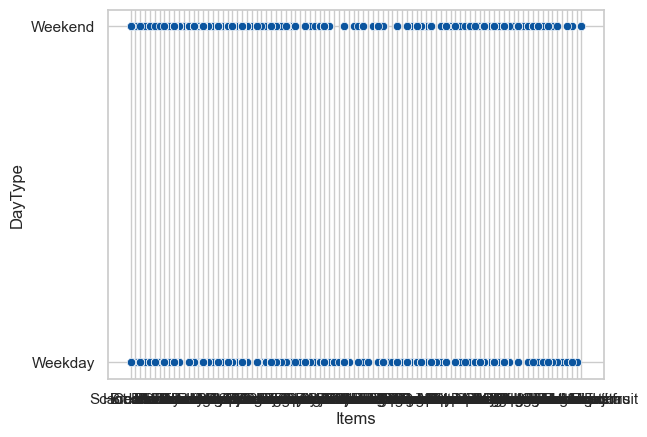

In [18]:
kolom_x = 'Items'
kolom_y = 'DayType'

df = pd.read_csv('Bakery.csv')

# Buat scatter plot
sns.scatterplot(x=kolom_x, y=kolom_y, data=df)
plt.show()

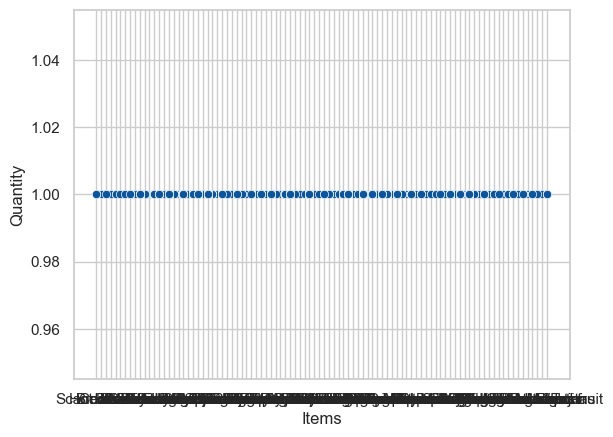

In [19]:
kolom_x = 'Items'
kolom_y = 'Quantity'

df = pd.read_csv('Bakery.csv')

# Buat scatter plot
sns.scatterplot(x=kolom_x, y=kolom_y, data=df)
plt.show()

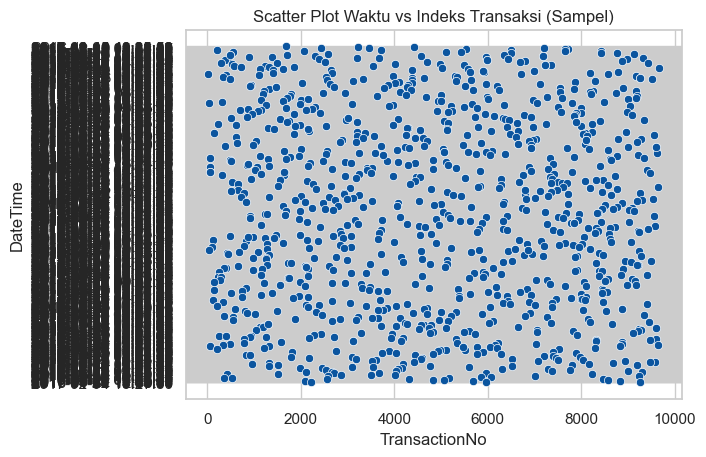

In [20]:
# Ambil sampel acak 1000 baris dari DataFrame
df_sample = df.sample(n=1000, random_state=11)

# Gunakan scatter plot untuk menunjukkan waktu vs indeks transaksi
sns.scatterplot(x='TransactionNo', y='DateTime', data=df_sample)
plt.title('Scatter Plot Waktu vs Indeks Transaksi (Sampel)')
plt.show()

In [ ]:
# Data Insight

In [21]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Quantity
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,1
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,1
2,3,Cookies,2016-10-30 10:07:57,Morning,Weekend,1
3,3,Jam,2016-10-30 10:07:57,Morning,Weekend,1
4,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,1


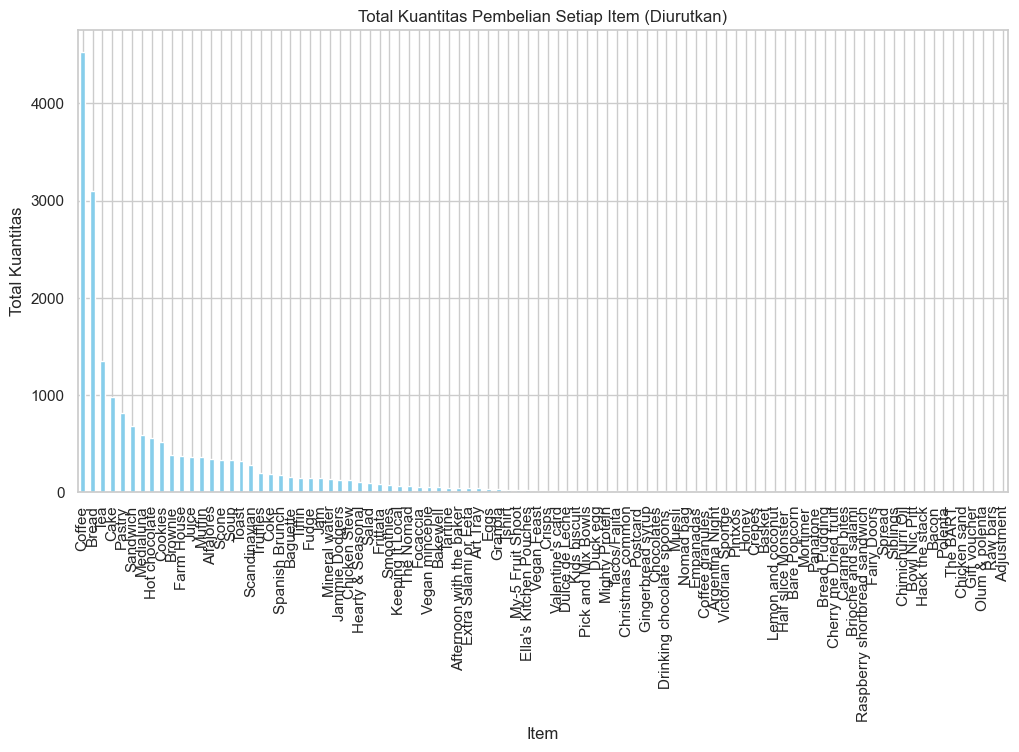

In [22]:
# Menghitung total kuantitas untuk setiap item
total_quantity_per_item = df.groupby('Items')['Quantity'].sum()

# Mengurutkan DataFrame berdasarkan total kuantitas secara descending
total_quantity_per_item_sorted = total_quantity_per_item.sort_values(ascending=False)

# Membuat bar chart
plt.figure(figsize=(12, 6))
total_quantity_per_item_sorted.plot(kind='bar', color='skyblue')
plt.title('Total Kuantitas Pembelian Setiap Item (Diurutkan)')
plt.xlabel('Item')
plt.ylabel('Total Kuantitas')
plt.show()

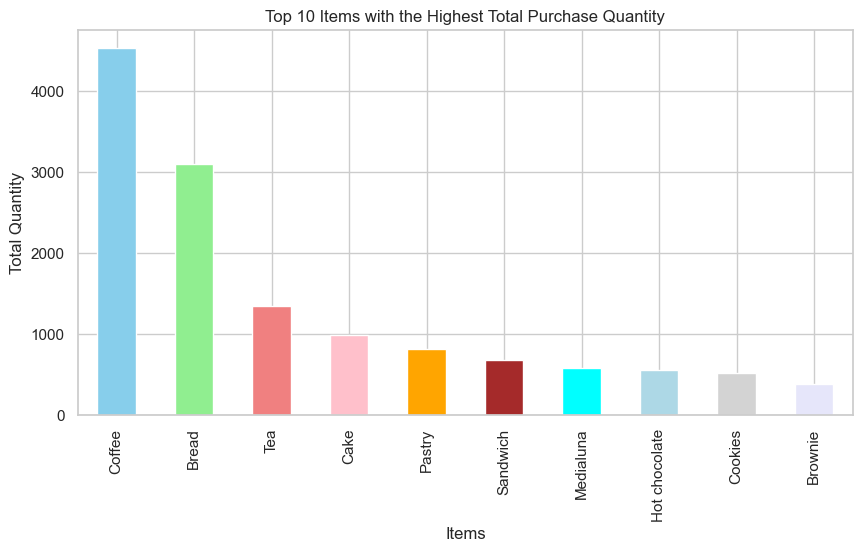

Items
Coffee           4528
Bread            3097
Tea              1350
Cake              983
Pastry            815
Sandwich          680
Medialuna         585
Hot chocolate     552
Cookies           515
Brownie           379
Name: Quantity, dtype: int64


In [49]:
top_10_items = total_quantity_per_item_sorted.head(10)
plt.figure(figsize=(10, 5))
top_10_items.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'pink', 'orange', 'brown', 'cyan', 'lightblue', 'lightgray', 'lavender'])
plt.title('Top 10 Items with the Highest Total Purchase Quantity')
plt.xlabel('Items')
plt.ylabel('Total Quantity')
plt.show()

print(top_10_items)

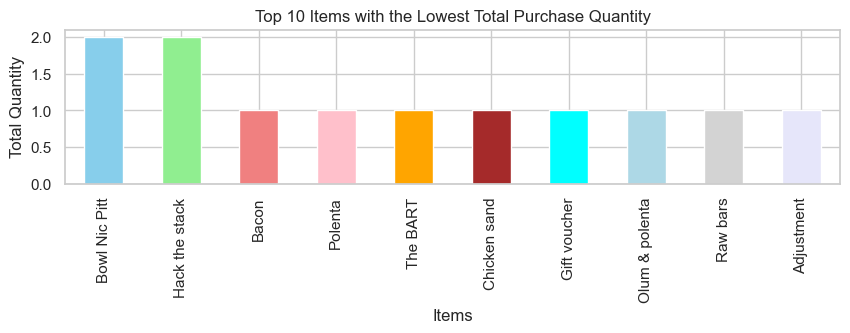

Items
Bowl Nic Pitt     2
Hack the stack    2
Bacon             1
Polenta           1
The BART          1
Chicken sand      1
Gift voucher      1
Olum & polenta    1
Raw bars          1
Adjustment        1
Name: Quantity, dtype: int64


In [50]:
top_10_items = total_quantity_per_item_sorted.tail(10)
plt.figure(figsize=(10, 2))
top_10_items.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'pink', 'orange', 'brown', 'cyan', 'lightblue', 'lightgray', 'lavender'])
plt.title('Top 10 Items with the Lowest Total Purchase Quantity')
plt.xlabel('Items')
plt.ylabel('Total Quantity')
plt.show()

print(top_10_items)

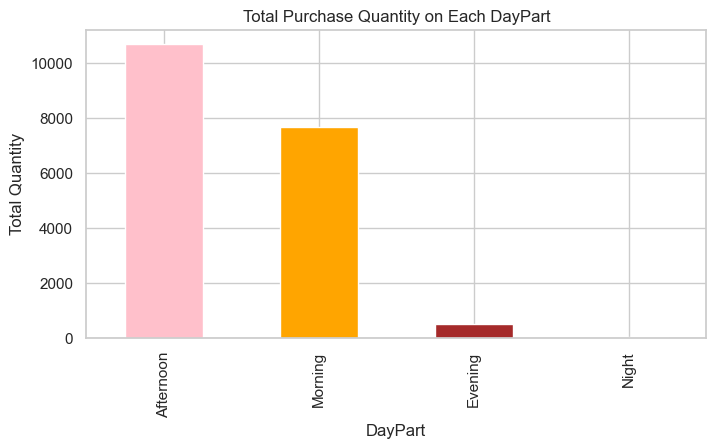

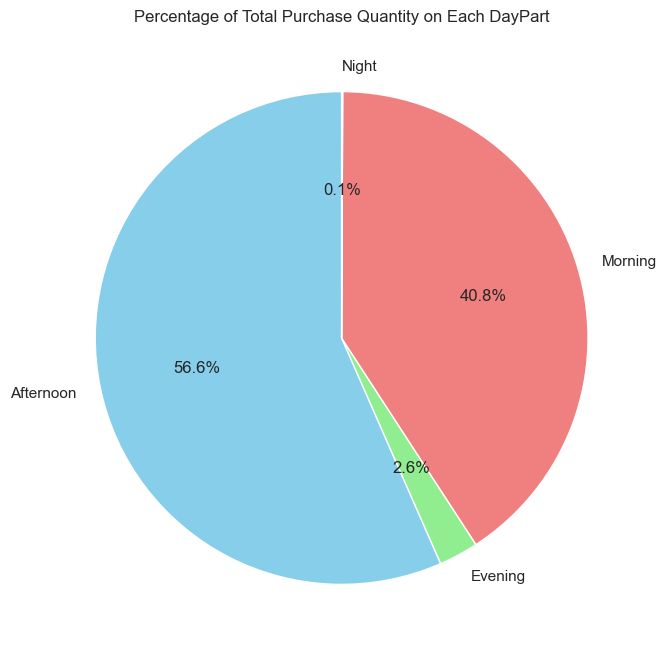

Daypart
Afternoon    10687
Morning       7697
Evening        490
Night           13
Name: Quantity, dtype: int64


In [51]:
# Menghitung total kuantitas untuk setiap daypart
total_quantity_per_daypart = df.groupby('Daypart')['Quantity'].sum()

# Mengurutkan DataFrame berdasarkan total kuantitas secara descending
total_quantity_per_daypart_sorted = total_quantity_per_daypart.sort_values(ascending=False)

# Membuat bar chart
plt.figure(figsize=(8, 4))
total_quantity_per_daypart_sorted.plot(kind='bar', color=[ 'pink', 'orange', 'brown', 'cyan'])
plt.title('Total Purchase Quantity on Each DayPart')
plt.xlabel('DayPart')
plt.ylabel('Total Quantity')
plt.show()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_quantity_per_daypart, labels=total_quantity_per_daypart.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Percentage of Total Purchase Quantity on Each DayPart')
plt.show()

print(total_quantity_per_daypart_sorted)

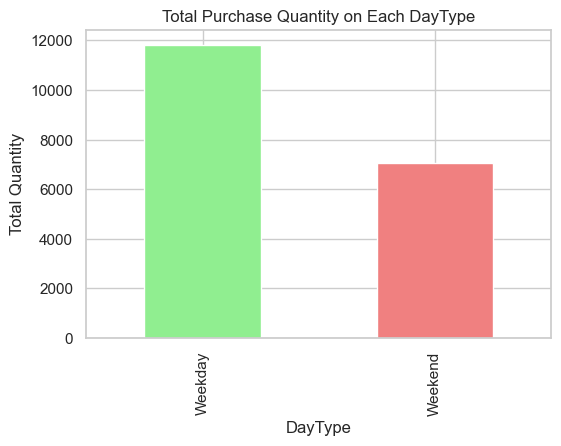

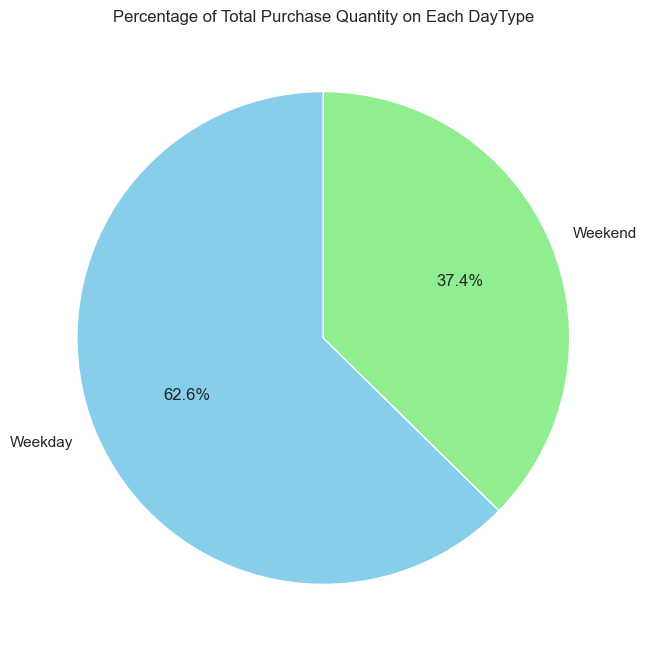

DayType
Weekday    11830
Weekend     7057
Name: Quantity, dtype: int64


In [52]:
# Menghitung total kuantitas untuk setiap daypart
total_quantity_per_daytype = df.groupby('DayType')['Quantity'].sum()

# Mengurutkan DataFrame berdasarkan total kuantitas secara descending
total_quantity_per_daytype_sorted = total_quantity_per_daytype.sort_values(ascending=False)

# Membuat bar chart
plt.figure(figsize=(6, 4))
total_quantity_per_daytype_sorted.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Total Purchase Quantity on Each DayType')
plt.xlabel('DayType')
plt.ylabel('Total Quantity')
plt.show()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_quantity_per_daytype, labels=total_quantity_per_daytype.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Percentage of Total Purchase Quantity on Each DayType')
plt.show()

print(total_quantity_per_daytype_sorted)

In [29]:
#Filter
morning_df = df[df['Daypart'] == 'Morning']
afternoon_df = df[df['Daypart'] == 'Afternoon']
evening_df = df[df['Daypart'] == 'Evening']
night_df = df[df['Daypart'] == 'Night']

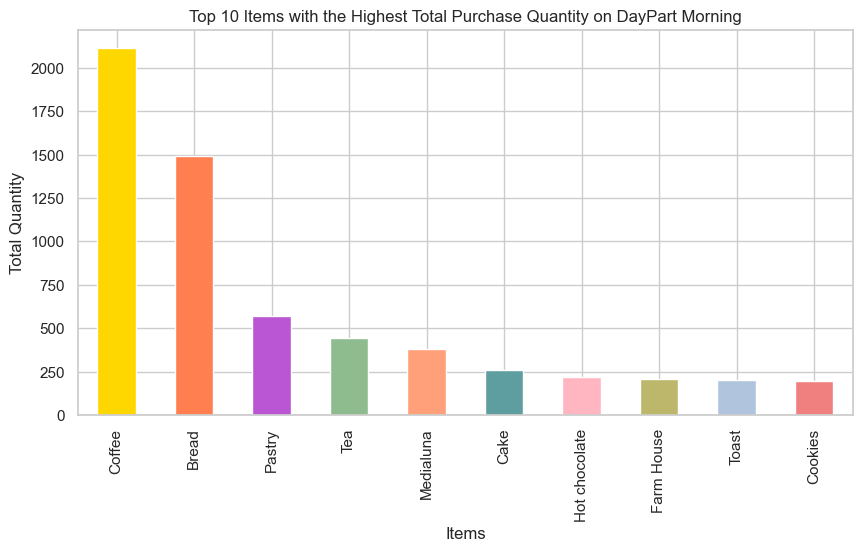

Items
Coffee           2113
Bread            1490
Pastry            572
Tea               441
Medialuna         380
Cake              259
Hot chocolate     217
Farm House        207
Toast             204
Cookies           195
Name: Quantity, dtype: int64


In [53]:

# Menghitung total kuantitas untuk setiap item pada daypart "morning"
total_quantity_per_item_morning = morning_df.groupby('Items')['Quantity'].sum()

# Mengurutkan DataFrame berdasarkan total kuantitas secara descending
total_quantity_per_item_morning_sorted = total_quantity_per_item_morning.sort_values(ascending=False)

# Membatasi untuk menampilkan 10 item teratas
top_10_items_morning = total_quantity_per_item_morning_sorted.head(10)

# Membuat bar chart
plt.figure(figsize=(10, 5))
top_10_items_morning.plot(kind='bar', color=['gold', 'coral', 'mediumorchid', 'darkseagreen', 'lightsalmon', 'cadetblue', 'lightpink', 'darkkhaki', 'lightsteelblue', 'lightcoral'])
plt.title('Top 10 Items with the Highest Total Purchase Quantity on DayPart Morning')
plt.xlabel('Items')
plt.ylabel('Total Quantity')
plt.show()

print(top_10_items_morning)

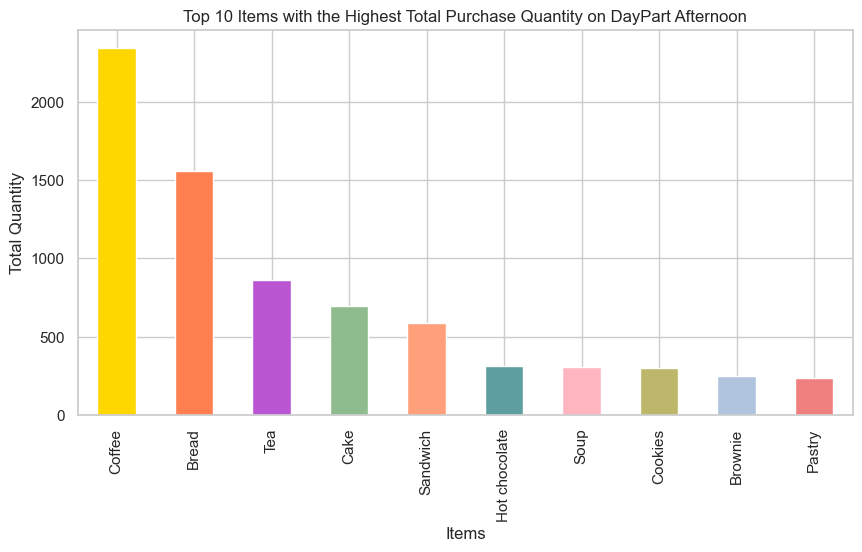

Items
Coffee           2340
Bread            1556
Tea               864
Cake              696
Sandwich          590
Hot chocolate     313
Soup              309
Cookies           300
Brownie           249
Pastry            233
Name: Quantity, dtype: int64


In [55]:
# Menghitung total kuantitas untuk setiap item pada daypart "Afternoon"
total_quantity_per_item_afternoon = afternoon_df.groupby('Items')['Quantity'].sum()

# Mengurutkan DataFrame berdasarkan total kuantitas secara descending
total_quantity_per_item_afternoon_sorted = total_quantity_per_item_afternoon.sort_values(ascending=False)

# Membatasi untuk menampilkan 10 item teratas
top_10_items_afternoon = total_quantity_per_item_afternoon_sorted.head(10)

# Membuat bar chart
plt.figure(figsize=(10, 5))
top_10_items_afternoon.plot(kind='bar', color=['gold', 'coral', 'mediumorchid', 'darkseagreen', 'lightsalmon', 'cadetblue', 'lightpink', 'darkkhaki', 'lightsteelblue', 'lightcoral'])
plt.title('Top 10 Items with the Highest Total Purchase Quantity on DayPart Afternoon')
plt.xlabel('Items')
plt.ylabel('Total Quantity')
plt.show()

print(top_10_items_afternoon)

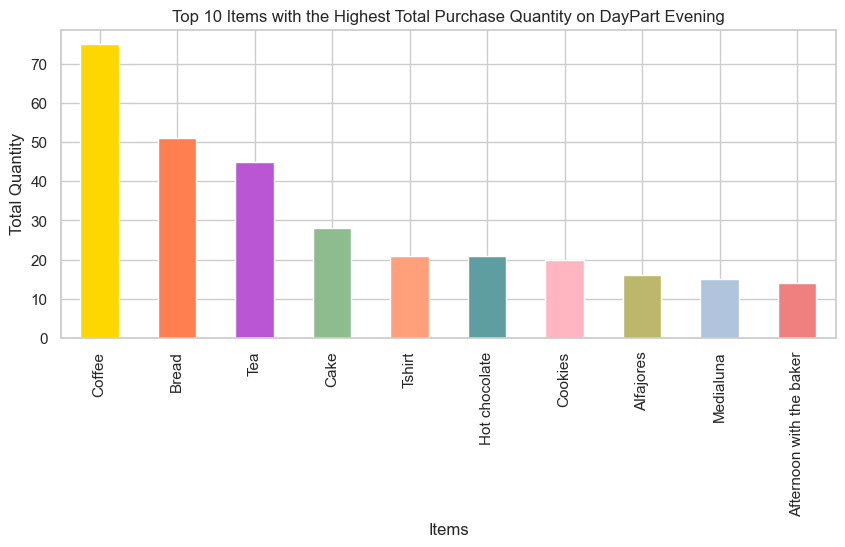

Items
Coffee                      75
Bread                       51
Tea                         45
Cake                        28
Tshirt                      21
Hot chocolate               21
Cookies                     20
Alfajores                   16
Medialuna                   15
Afternoon with the baker    14
Name: Quantity, dtype: int64


In [57]:
# Menghitung total kuantitas untuk setiap item pada daypart "Evening"
total_quantity_per_item_evening = evening_df.groupby('Items')['Quantity'].sum()

# Mengurutkan DataFrame berdasarkan total kuantitas secara descending
total_quantity_per_item_evening_sorted = total_quantity_per_item_evening.sort_values(ascending=False)

# Membatasi untuk menampilkan 10 item teratas
top_10_items_evening = total_quantity_per_item_evening_sorted.head(10)

# Membuat bar chart
plt.figure(figsize=(10, 4))
top_10_items_evening.plot(kind='bar', color=['gold', 'coral', 'mediumorchid', 'darkseagreen', 'lightsalmon', 'cadetblue', 'lightpink', 'darkkhaki', 'lightsteelblue', 'lightcoral'])
plt.title('Top 10 Items with the Highest Total Purchase Quantity on DayPart Evening')
plt.xlabel('Items')
plt.ylabel('Total Quantity')
plt.show()

print(top_10_items_evening)

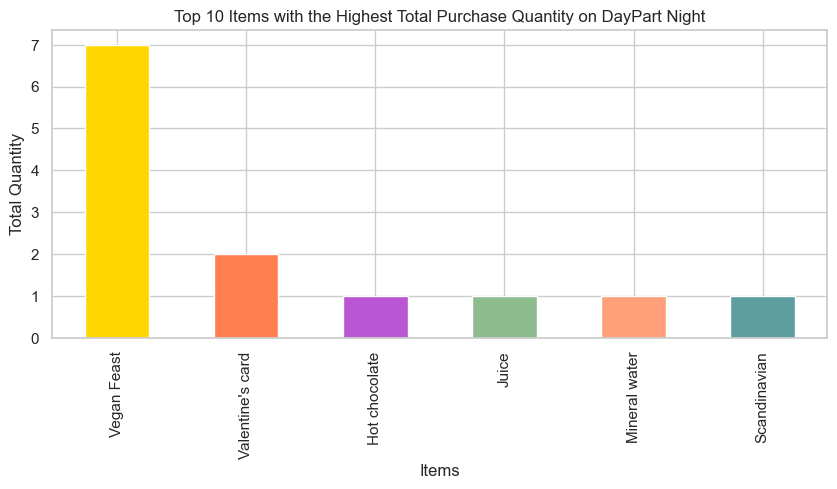

Items
Vegan Feast         7
Valentine's card    2
Hot chocolate       1
Juice               1
Mineral water       1
Scandinavian        1
Name: Quantity, dtype: int64


In [59]:
# Menghitung total kuantitas untuk setiap item pada daypart "Night"
total_quantity_per_item_night = night_df.groupby('Items')['Quantity'].sum()

# Mengurutkan DataFrame berdasarkan total kuantitas secara descending
total_quantity_per_item_night_sorted = total_quantity_per_item_night.sort_values(ascending=False)

# Membatasi untuk menampilkan 10 item teratas
top_10_items_night = total_quantity_per_item_night_sorted.head(10)

# Membuat bar chart
plt.figure(figsize=(10, 4))
top_10_items_night.plot(kind='bar', color=['gold', 'coral', 'mediumorchid', 'darkseagreen', 'lightsalmon', 'cadetblue'])
plt.title('Top 10 Items with the Highest Total Purchase Quantity on DayPart Night')
plt.xlabel('Items')
plt.ylabel('Total Quantity')
plt.show()

print(top_10_items_night)

In [38]:
#Filter
weekday_df = df[df['DayType'] == 'Weekday']
weekend_df = df[df['DayType'] == 'Weekend']

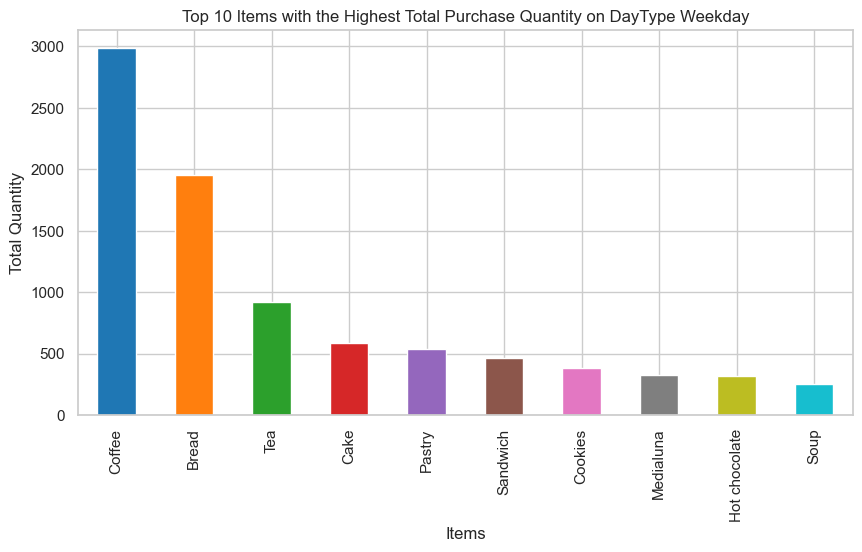

Items
Coffee           2984
Bread            1953
Tea               918
Cake              589
Pastry            538
Sandwich          463
Cookies           381
Medialuna         324
Hot chocolate     316
Soup              256
Name: Quantity, dtype: int64


In [60]:
# Menghitung total kuantitas untuk setiap item pada dayType "Weekday"
total_quantity_per_item_weekday = weekday_df.groupby('Items')['Quantity'].sum()

# Mengurutkan DataFrame berdasarkan total kuantitas secara descending
total_quantity_per_item_weekday_sorted = total_quantity_per_item_weekday.sort_values(ascending=False)

# Membatasi untuk menampilkan 10 item teratas
top_10_items_weekday = total_quantity_per_item_weekday_sorted.head(10)

# Membuat bar chart
plt.figure(figsize=(10, 5))
top_10_items_weekday.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
plt.title('Top 10 Items with the Highest Total Purchase Quantity on DayType Weekday')
plt.xlabel('Items')
plt.ylabel('Total Quantity')
plt.show()

print(top_10_items_weekday)

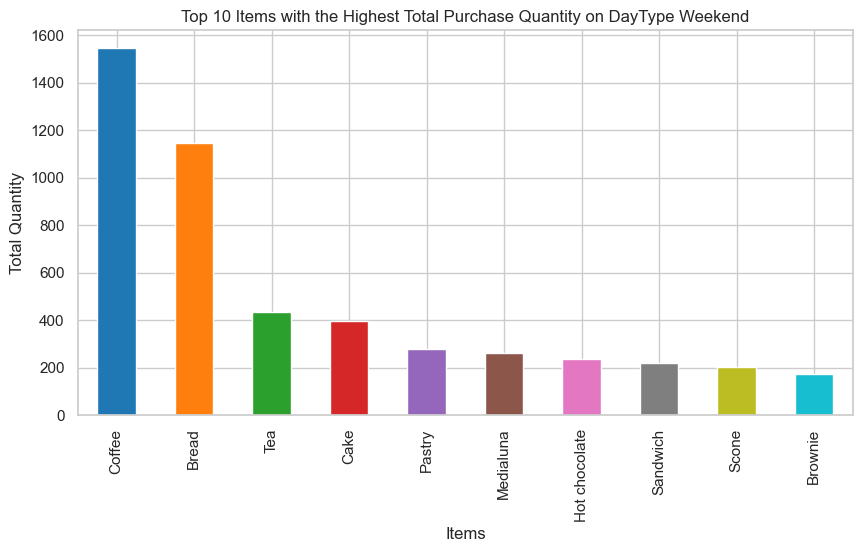

Items
Coffee           1544
Bread            1144
Tea               432
Cake              394
Pastry            277
Medialuna         261
Hot chocolate     236
Sandwich          217
Scone             203
Brownie           172
Name: Quantity, dtype: int64


In [62]:
# Menghitung total kuantitas untuk setiap item pada dayType "Weekend"
total_quantity_per_item_weekend = weekend_df.groupby('Items')['Quantity'].sum()

# Mengurutkan DataFrame berdasarkan total kuantitas secara descending
total_quantity_per_item_weekend_sorted = total_quantity_per_item_weekend.sort_values(ascending=False)

# Membatasi untuk menampilkan 10 item teratas
top_10_items_weekend = total_quantity_per_item_weekend_sorted.head(10)

# Membuat bar chart
plt.figure(figsize=(10, 5))
top_10_items_weekend.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
plt.title('Top 10 Items with the Highest Total Purchase Quantity on DayType Weekend')
plt.xlabel('Items')
plt.ylabel('Total Quantity')
plt.show()

print(top_10_items_weekend)

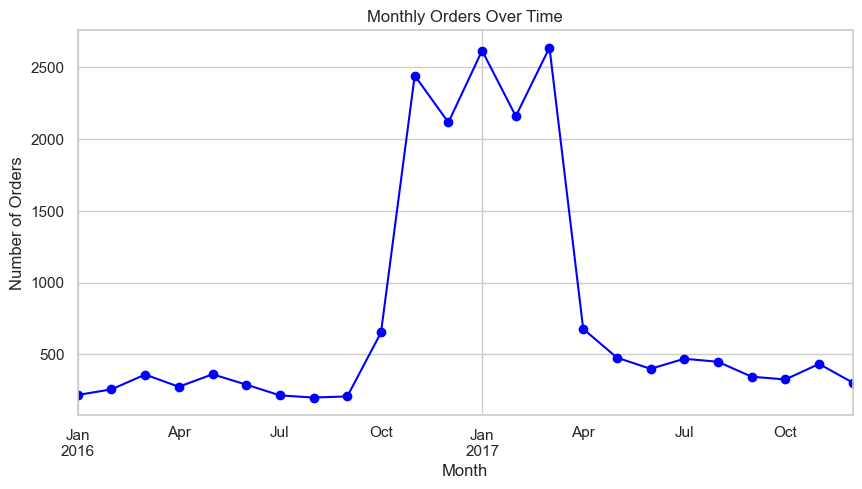

In [48]:
# Ubah kolom DateTime menjadi tipe datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Agregasi berdasarkan bulan dan menghitung jumlah transaksi
monthly_orders = df.resample('M', on='DateTime')['TransactionNo'].count()

# Membuat line chart
plt.figure(figsize=(10, 5))
monthly_orders.plot(marker='o', linestyle='-', color='b')
plt.title('Monthly Orders Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()